In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import seaborn as sns
import numpy as np
  

In [2]:
df = pd.read_csv("../datasets/stats/stats.csv", sep=';')
df.tail()

,red_fighter_name,blue_fighter_name,event_date,red_fighter_nickname,blue_fighter_nickname,red_fighter_result,blue_fighter_result,method,round,time,...,red_fighter_sig_str_body_pct,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct
7749,ORLANDO WIET,ROBERT LUCARELLI,11/03/1994,The Gladiator,-,W,L,KO/TKO,1,2:50,...,12,0,0,50,12,100,0,0,87,0
7750,FRANK HAMAKER,THADDEUS LUSTER,11/03/1994,-,-,W,L,Submission,1,4:52,...,0,0,0,0,50,0,0,0,50,0
7751,JOHNNY RHODES,DAVID LEVICKI,11/03/1994,-,-,W,L,KO/TKO,1,12:13,...,9,0,9,0,9,25,9,50,81,25
7752,PATRICK SMITH,RAY WIZARD,11/03/1994,-,-,W,L,Submission,1,0:58,...,100,0,0,100,0,100,100,0,0,0
7753,SCOTT MORRIS,SEAN DAUGHERTY,11/03/1994,-,-,W,L,Submission,1,0:20,...,0,0,0,0,0,0,100,0,0,0


# Establishing questions

### Here are a few questions I want to be answered by the end of this notebook:
1. What are the most popular locations that UFC hosts its events in?
2. What is the historical average amount of UFC fights hosted annually?
3. What are the top fight outcomes?
4. What are the main fight tactics contributing to a victory?
5. Does being in a particular corner contribute to a victory? (This one is a meme, but we in meme mood today)

# Data preprocessing

### Creating a single *winner* feature instead of two *red_fighter_result* and *blue_fighter_result* features

In [3]:
df.loc[:, 'winner'] = df['red_fighter_result'].apply(lambda x: 'red' if x == 'W' else 'blue')

### Changing columns from *red/blue+feature name* to *winner/loser+feature name*

In [4]:
df.head()

,red_fighter_name,blue_fighter_name,event_date,red_fighter_nickname,blue_fighter_nickname,red_fighter_result,blue_fighter_result,method,round,time,...,blue_fighter_sig_str_body_pct,red_fighter_sig_str_leg_pct,blue_fighter_sig_str_leg_pct,red_fighter_sig_str_distance_pct,blue_fighter_sig_str_distance_pct,red_fighter_sig_str_clinch_pct,blue_fighter_sig_str_clinch_pct,red_fighter_sig_str_ground_pct,blue_fighter_sig_str_ground_pct,winner
0,ILIA TOPURIA,MAX HOLLOWAY,26/10/2024,El Matador,Blessed,W,L,KO/TKO,3,1:34,...,16,20,24,94,100,0,0,5,0,red
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,26/10/2024,The Reaper,Borz,L,W,Submission,1,3:34,...,33,100,0,100,0,0,0,0,100,blue
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,26/10/2024,-,Rocket,W,L,Decision - Unanimous,3,5:00,...,16,23,64,90,94,9,5,0,0,red
3,LERONE MURPHY,DAN IGE,26/10/2024,The Miracle,50K,W,L,Decision - Unanimous,3,5:00,...,10,7,13,71,69,23,13,5,17,red
4,SHARA MAGOMEDOV,ARMEN PETROSYAN,26/10/2024,Bullet,Superman,W,L,KO/TKO,2,4:52,...,12,18,58,96,97,3,2,0,0,red


In [5]:
def assign_winner_n_loser(df, columns_to_change, winner_col='winner'):
    for col in columns_to_change:
        df.loc[:, f"winner_{col.replace('fighter_', '')}"] = df[f"red_{col}"].where(df[winner_col] == 'red', df[f"blue_{col}"])
        df.loc[:, f"loser_{col.replace('fighter_', '')}"] = df[f"red_{col}"].where(df[winner_col] == 'blue', df[f"blue_{col}"])
        
    return df 

In [6]:
cols_to_change = ['fighter_name', 'fighter_nickname','fighter_KD',
                  'fighter_sig_str', 'fighter_sig_str_pct', 
                  'fighter_total_str', 'fighter_TD', 'fighter_TD_pct', 
                  'fighter_sub_att', 'fighter_rev', 'fighter_ctrl', 
                  'fighter_sig_str_head', 'fighter_sig_str_body', 
                  'fighter_sig_str_leg', 'fighter_sig_str_distance', 
                  'fighter_sig_str_clinch', 'fighter_sig_str_ground', 
                  'fighter_sig_str_head_pct', 'fighter_sig_str_body_pct', 
                  'fighter_sig_str_leg_pct', 'fighter_sig_str_distance_pct', 
                  'fighter_sig_str_clinch_pct', 'fighter_sig_str_ground_pct']

df = assign_winner_n_loser(df, cols_to_change)
df.head()

,red_fighter_name,blue_fighter_name,event_date,red_fighter_nickname,blue_fighter_nickname,red_fighter_result,blue_fighter_result,method,round,time,...,winner_sig_str_body_pct,loser_sig_str_body_pct,winner_sig_str_leg_pct,loser_sig_str_leg_pct,winner_sig_str_distance_pct,loser_sig_str_distance_pct,winner_sig_str_clinch_pct,loser_sig_str_clinch_pct,winner_sig_str_ground_pct,loser_sig_str_ground_pct
0,ILIA TOPURIA,MAX HOLLOWAY,26/10/2024,El Matador,Blessed,W,L,KO/TKO,3,1:34,...,14,16,20,24,94,100,0,0,5,0
1,ROBERT WHITTAKER,KHAMZAT CHIMAEV,26/10/2024,The Reaper,Borz,L,W,Submission,1,3:34,...,33,0,0,100,0,100,0,0,100,0
2,MAGOMED ANKALAEV,ALEKSANDAR RAKIC,26/10/2024,-,Rocket,W,L,Decision - Unanimous,3,5:00,...,40,16,23,64,90,94,9,5,0,0
3,LERONE MURPHY,DAN IGE,26/10/2024,The Miracle,50K,W,L,Decision - Unanimous,3,5:00,...,23,10,7,13,71,69,23,13,5,17
4,SHARA MAGOMEDOV,ARMEN PETROSYAN,26/10/2024,Bullet,Superman,W,L,KO/TKO,2,4:52,...,44,12,18,58,96,97,3,2,0,0


### Dropping the old features, leaving the new *winner/loser* ones

In [7]:
df = df.loc[:, ['event_date', 'method', 'round', 'time', 'time_format', 
           'referee', 'details', 'bout_type', 'bonus', 'event_name', 'event_location']].join(df.iloc[:, -47:])
df.head()


,event_date,method,round,time,time_format,referee,details,bout_type,bonus,event_name,...,winner_sig_str_body_pct,loser_sig_str_body_pct,winner_sig_str_leg_pct,loser_sig_str_leg_pct,winner_sig_str_distance_pct,loser_sig_str_distance_pct,winner_sig_str_clinch_pct,loser_sig_str_clinch_pct,winner_sig_str_ground_pct,loser_sig_str_ground_pct
0,26/10/2024,KO/TKO,3,1:34,5 Rnd (5-5-5-5-5),Marc Goddard,Punch to Head At Distance,UFC Featherweight Title Bout,belt,UFC 308: Topuria vs. Holloway,...,14,16,20,24,94,100,0,0,5,0
1,26/10/2024,Submission,1,3:34,5 Rnd (5-5-5-5-5),Jason Herzog,Rear Naked Choke,Middleweight Bout,perf,UFC 308: Topuria vs. Holloway,...,33,0,0,100,0,100,0,0,100,0
2,26/10/2024,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Vitor Ribeiro,Sal D'amato 28 - 29. Jacob Montalvo 28 - 29. T...,Light Heavyweight Bout,-,UFC 308: Topuria vs. Holloway,...,40,16,23,64,90,94,9,5,0,0
3,26/10/2024,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,Mike Bell 28 - 29. Ben Cartlidge 28 - 29. Hadi...,Featherweight Bout,-,UFC 308: Topuria vs. Holloway,...,23,10,7,13,71,69,23,13,5,17
4,26/10/2024,KO/TKO,2,4:52,3 Rnd (5-5-5),Kerry Hatley,Spinning Back Fist Head,Middleweight Bout,perf,UFC 308: Topuria vs. Holloway,...,44,12,18,58,96,97,3,2,0,0


# Data Cleaning

## NaN values

In [8]:
df.isnull().sum().sum()

0

Replacing NaN entry fillers with zeros

In [9]:
df = df.replace(['-', '--', '---'], "0")

## Duplicates

In [10]:
df.duplicated().sum()

0

We can see that there's no NaNs nor duplicates. Let's go to EDA.

# Feature Engineering

## Standardizing some features

### Standardizing base values into pct %

In [11]:
import re

def convert_total_str_to_pct(row):
    row = row.split("of")
    return (int(row[0]) * 100) / int(row[1]) if re.search(r"\d", row[0]) and int(row[0]) != 0 else 0

In [12]:
df.loc[:, 'winner_total_str_landed_pct'] = df['winner_total_str'].apply(convert_total_str_to_pct)
df.loc[:, 'loser_total_str_landed_pct'] = df['loser_total_str'].apply(convert_total_str_to_pct)

### Standardizing time from *mm:ss* into total *ss*

#### Replacing -- and - entries with zeros

In [13]:
df.loc[df['winner_ctrl'].isin(['--', '-', '0']), 'winner_ctrl'] = '0:00'
df.loc[df['loser_ctrl'].isin(['--', '-', '0']), 'loser_ctrl'] = '0:00'

df.loc[:, 'winner_ctrl'] = pd.to_timedelta("00:" + df.loc[:, 'winner_ctrl']).dt.total_seconds()
df.loc[:, 'loser_ctrl'] = pd.to_timedelta("00:" + df.loc[:, 'loser_ctrl']).dt.total_seconds()

## Dropping redundant features

In [14]:
df.drop(['loser_sig_str', 'winner_total_str', 'loser_total_str', 'winner_sig_str', 'winner_TD', 'loser_TD', 'winner_sig_str_head', 'loser_sig_str_head', 'winner_sig_str_body', 'loser_sig_str_body', 'winner_sig_str_leg', 'loser_sig_str_leg', 'winner_sig_str_distance', 'loser_sig_str_distance', 'winner_sig_str_clinch', 'loser_sig_str_clinch', 'winner_sig_str_ground', 'loser_sig_str_ground'], axis=1, inplace=True)

## Engineering new features

### Let's engineer some additional features:
1. **Striking dominance** - a fighter's overall striking performance. Calculated as: KD + Significant strikes % + Total landed strikes %;
2. **Wrestling dominance** - a fightes's overall wrestling performance. Calculated as: TD % + Submission attempts + reversals;

**Striking dominance:**

Converting types from string to float:

Defining the actual features:

In [15]:
df['winner_KD'] = df['winner_KD'].astype(float)
df['winner_sig_str_pct'] = df['winner_sig_str_pct'].astype(float)
df['winner_total_str_landed_pct'] = df['winner_total_str_landed_pct'].astype(float)

df['loser_KD'] = df['loser_KD'].astype(float)
df['loser_sig_str_pct'] = df['loser_sig_str_pct'].astype(float)
df['loser_total_str_landed_pct'] = df['loser_total_str_landed_pct'].astype(float)

In [16]:
df['winner_striking_dominance'] = df['winner_KD'] + df['winner_sig_str_pct'] + df['winner_total_str_landed_pct']
df['loser_striking_dominance'] = df['loser_KD'] + df['loser_sig_str_pct'] + df['loser_total_str_landed_pct']

**Wrestling dominance:**

Converting types from string to float:

In [17]:
df['winner_TD_pct'] = df['winner_TD_pct'].astype(float)
df['winner_sub_att'] = df['winner_sub_att'].astype(float)
df['winner_rev'] = df['winner_rev'].astype(float)

df['loser_TD_pct'] = df['loser_TD_pct'].astype(float)
df['loser_sub_att'] = df['loser_sub_att'].astype(float)
df['loser_rev'] = df['loser_rev'].astype(float)

Defining the actual features:

In [18]:
df['winner_wrestling_dominance'] = df['winner_TD_pct'] + df['winner_sub_att'] + df['winner_rev']
df['loser_wrestling_dominance'] = df['loser_TD_pct'] + df['loser_sub_att'] + df['loser_rev']

## Dtypes

In [19]:
cols_to_change = ["winner_ctrl", "loser_ctrl", "winner_sig_str_head_pct", "loser_sig_str_head_pct", "winner_sig_str_body_pct", "loser_sig_str_body_pct", "winner_sig_str_leg_pct", "loser_sig_str_leg_pct", "winner_sig_str_distance_pct", "loser_sig_str_distance_pct", "winner_sig_str_clinch_pct", "loser_sig_str_clinch_pct", "winner_sig_str_ground_pct", "loser_sig_str_ground_pct"]
for col in cols_to_change:
    df[col] = df[col].astype(float)

# EDA

## 1. What are the most popular locations that UFC hosts its events in?

Preparing data for plotting (taking the top 10 locations by hosting frequency):

In [20]:
counts = df[['event_name', 'event_location']].drop_duplicates()
counts = counts['event_location'].value_counts()
top_10_locations = counts.nlargest(20)

Plotting:

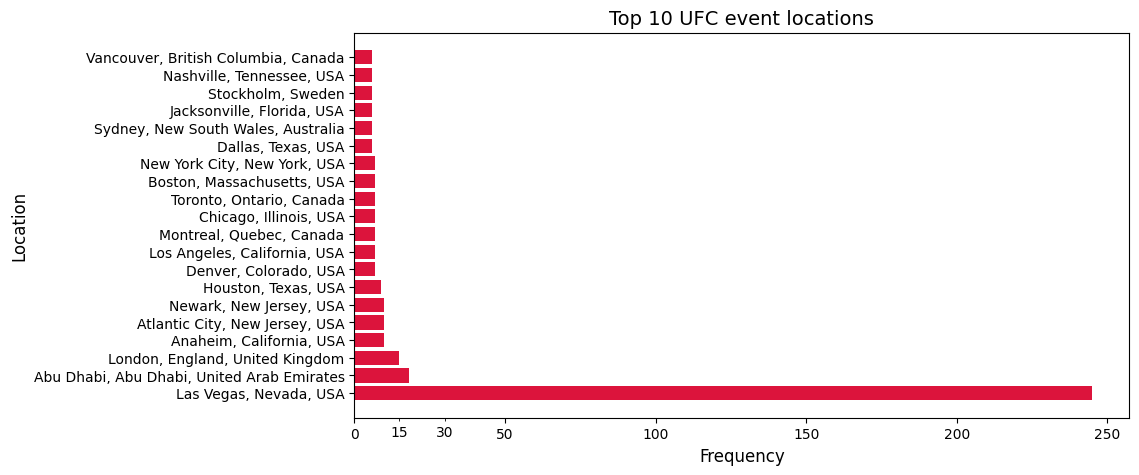

In [21]:
import matplotlib.ticker as ticker

# Main
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(top_10_locations.index, top_10_locations.values, color='#DC143C')
ax.set_title("Top 10 UFC event locations", fontdict={'fontsize': 14})
ax.set_xlabel("Frequency", fontdict={'fontsize': 12})
ax.set_ylabel("Location", fontdict={'fontsize': 12})

# Minor tick labels
ax.xaxis.set_minor_locator(ticker.FixedLocator([15, 30]))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter([15, 30]))
plt.show()

In [22]:
# Converting to a % pct format
pct = counts / sum(counts) * 100

# Extracting only the Las Vegas, Nevada, USA
pct = pct[:1]

# Calculating how much % pct is the rest
pct.loc["Others"] = 100 - sum(pct.values)
pct.head()

event_location
Las Vegas, Nevada, USA    34.555712
Others                    65.444288
Name: count, dtype: float64

Looks like *Las Vegas, Nevada, USA* takes up the big most of it.
<br>Let's check out what it looks like in percentages.

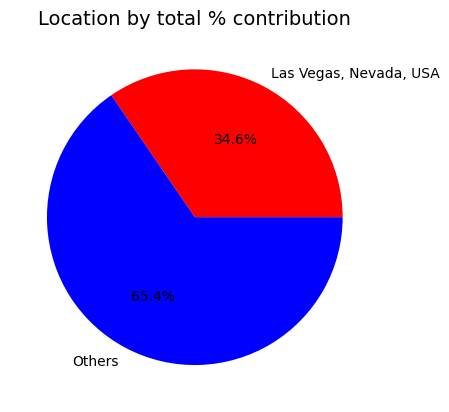

In [23]:
fig, ax = plt.subplots()
ax.pie(pct, labels=pct.index, autopct="%1.1f%%", colors=['red', 'blue'])
ax.set_title("Location by total % contribution", fontdict={'fontsize': 14})
plt.show()

We can see that it, single handedly, takes 34.6% of the total events pool

## 2. What is the historical average amount of UFC fights hosted annually?

Preparing the data for plotting. Dropping duplicates, saving only the annual data and then sorting it.

In [24]:
# Drop
events_annually = df[['event_name', 'event_date']].drop_duplicates()
events_annually['event_date'] = pd.to_datetime(events_annually['event_date'], dayfirst=True).dt.year
events_annually_counts = events_annually['event_date'].value_counts(sort=False)

Let's plot this:

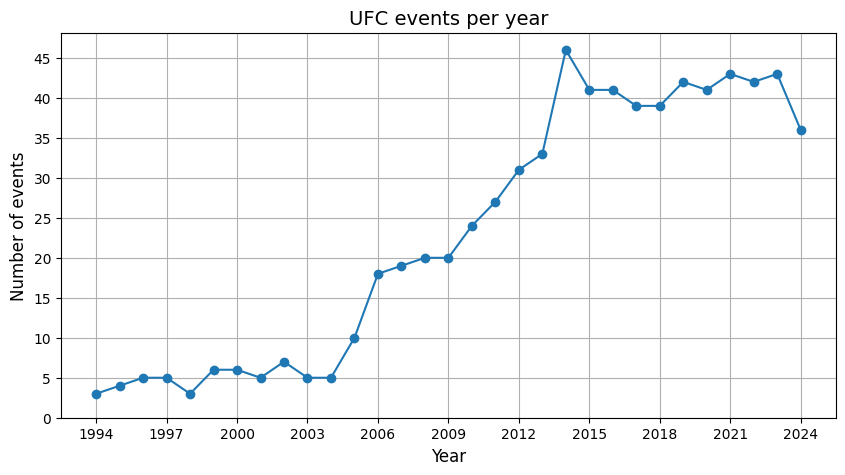

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(events_annually_counts, marker='o')
ax.set_title("UFC events per year", fontdict={'fontsize': 14})
ax.set_xlabel("Year", fontdict={'fontsize': 12})
ax.set_ylabel("Number of events", fontdict={'fontsize': 12})
plt.grid(True)

# Starting from the earliest year, up until now, with a stepping size of 3
ax.set_xticks(range(min(events_annually_counts.index), max(events_annually_counts.index)+1, 3))
# Starting from 0 up until the max frequency, with a steping size of 5
ax.set_yticks(range(0, max(events_annually_counts.values), 5))
plt.show()

We can observe the following:
* The chart starts out with initial steady growth throughout 1995-2005, fluctuating of 2-3 events on average;
* Then we see the rapid growth phase between 2005-2014, reaching a peak in 2014;
* After which throughout 2015-2023 it goes into relative plateau with fluctuations of 2-3 events on average;
* 2024 is still going so we're not going to do any conclusions here just yet.

**Why** the rapid, almost exponential growth in the 2005-2014 stage? Potentially due to the start of adoption of UFC as a sport and looser regulation, to know for sure, we would have to look into more data, which is out of the scope of this dataset.

## 3. What are the top fight outcomes?

Getting the data ready:

In [26]:
top_fight_outcomes = df['method'].value_counts()
top_fight_outcomes

method
Decision - Unanimous       2793
KO/TKO                     2484
Submission                 1550
Decision - Split            750
TKO - Doctor's Stoppage      94
Decision - Majority          60
DQ                           23
Name: count, dtype: int64

Plotting it:

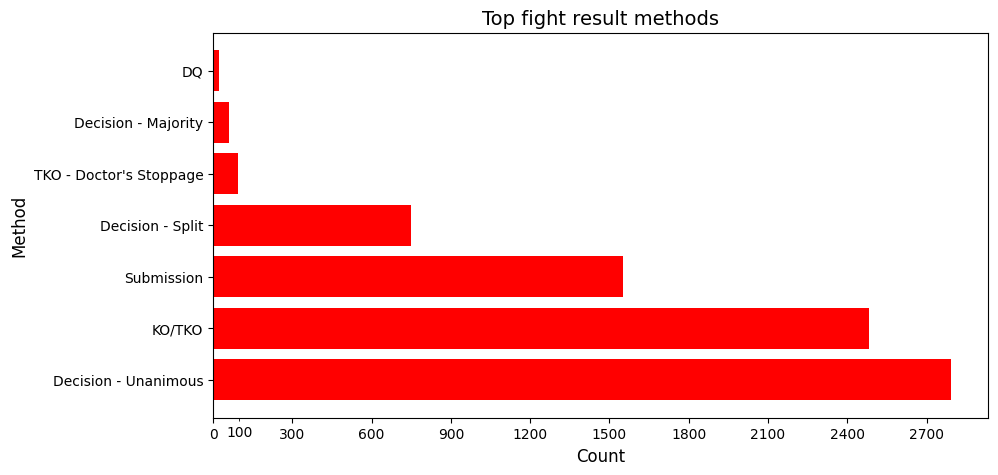

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(top_fight_outcomes.index, top_fight_outcomes.values, color='red')
ax.set_title("Top fight result methods", fontdict={'fontsize': 14})
ax.set_xlabel("Count", fontdict={'fontsize': 12})
ax.set_ylabel("Method", fontdict={'fontsize': 12})

# X ticks (large in minor) configuration
ax.set_xticks(range(0, max(top_fight_outcomes.values), 300))
ax.xaxis.set_minor_locator(ticker.FixedLocator([100]))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter([100]))
plt.show()

## 4. What are the main fight tactics contributing to a victory?

### Let's examine a few features between a winner and a loser:

In [29]:
# Mean, std, min/max, quartiles labels
mean_and_std_labels = df['winner_striking_dominance'].describe().index[1:].array


def examine_feature_kde(feature_name, log_transform=False):
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title(f"Winner_{feature_name} vs loser_{feature_name}", fontdict={'fontsize':14})
    
    sns.histplot(np.log1p(df[f'winner_{feature_name}']) if log_transform else df[f'winner_{feature_name}'], color='red', 
                kde=True, bins=120, label=f'winner_{feature_name}')
    sns.histplot(np.log1p(df[f'loser_{feature_name}']) if log_transform else df[f'loser_{feature_name}'], color='blue', 
                kde=True, bins=120, label=f'loser_{feature_name}')
    
    ax.set_xlabel(f"{feature_name}", fontdict={'fontsize': 12})
    ax.set_ylabel("Count", fontdict={'fontsize': 12})
    plt.legend()
    plt.show()


def examine_feature_mean_std(feature_name):
    # Winner values
    winner_feature_values = df[f'winner_{feature_name}'].describe().values[1:]
    # Loser values
    loser_feature_values = df[f'loser_{feature_name}'].describe().values[1:]

    # Plotting
    plt.figure(figsize=(10,5))
    # X ticks
    x = range(len(mean_and_std_labels))
    
    plt.bar(x, winner_feature_values, color='red', width=0.5, align='center', label=f'winner_{feature_name}')
    plt.bar(x, loser_feature_values, color='blue', width=0.5, align='edge', label=f'loser_{feature_name}')
    
    plt.xticks(x, mean_and_std_labels)
    plt.title(f"Mean, STDs and quartiles of the winner/loser {feature_name}", fontdict={'fontsize': 14})
    plt.xlabel("Data points", fontdict={'fontsize': 12})
    plt.ylabel("Counts", fontdict={'fontsize': 12})
    
    plt.legend()
    plt.show()

#### Striking Dominance

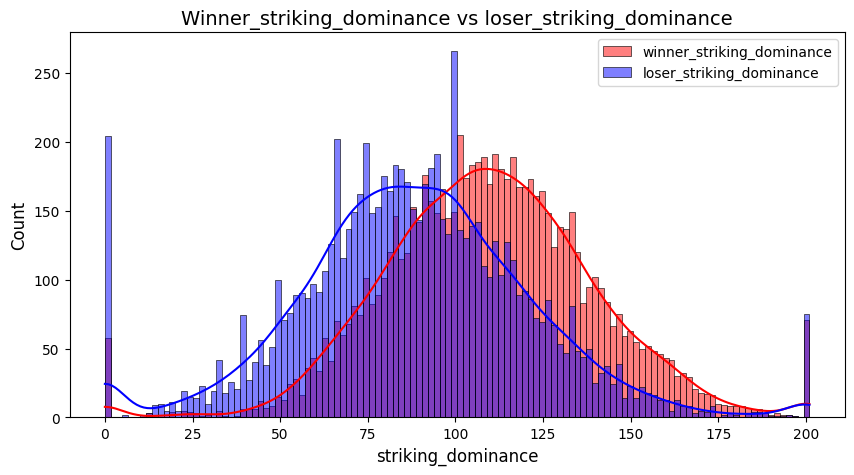

In [30]:
examine_feature_kde('striking_dominance')

Observations:
* We can clearly see that, winners have a higher striking dominance on average, with having a higher peak, and also mean being around 110, whereas losers have mean around 80, we will take a look at the exact numbers very shortly;
* There is a significant overlap in the 75-100 striking dominance factor range, indicating a significant striking opposition;
* We can also see a big amount of losers, as well as winners, having around 0 striking dominance, most likely due to being knocked out or submitted in the first round with having thrown zero punches, also the lack of data from the old events is possible, where they did not record these data points. We will look deeper into it in just a minute;
* There is also, what looks like a capped bin at the 200 range, which is obvious, because the feature "striking dominance factor" consists of two added pct % based features, which can possible have the maximum value of 100%, thus 100+100=200 bin. (Also the kD feature plays the role in the feature creation, which is the number of knockdowns, and by default is very low: in 0-5 range, thus the bin is not exactly at 200, but more like 200-205).


Let's check the mean and std:

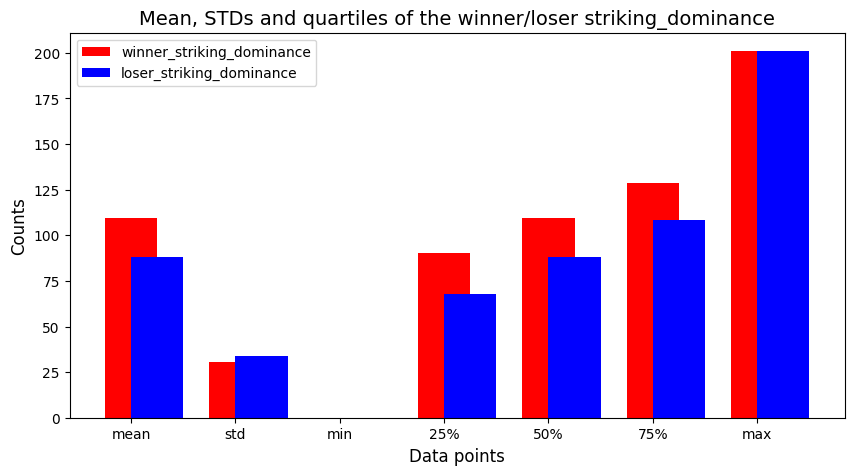

In [31]:
examine_feature_mean_std('striking_dominance')

Observations:
* As we said, the mean difference is about 20 points!
* Standard deviation is a bit higher for losers;
* All quartiles are bigger for the winner, indicating a clear striking contribution to the fight outcome.

Let's investigate deeper whether the big bin with striking dominance factor 0 is due to the losers being knocked out in the first round / lack of data

In [32]:
zero_winner_striking_dominance = df.loc[df['winner_striking_dominance'] == 0, ['round']].value_counts()
zero_loser_striking_dominance = df.loc[df['loser_striking_dominance'] == 0, ['round']].value_counts()

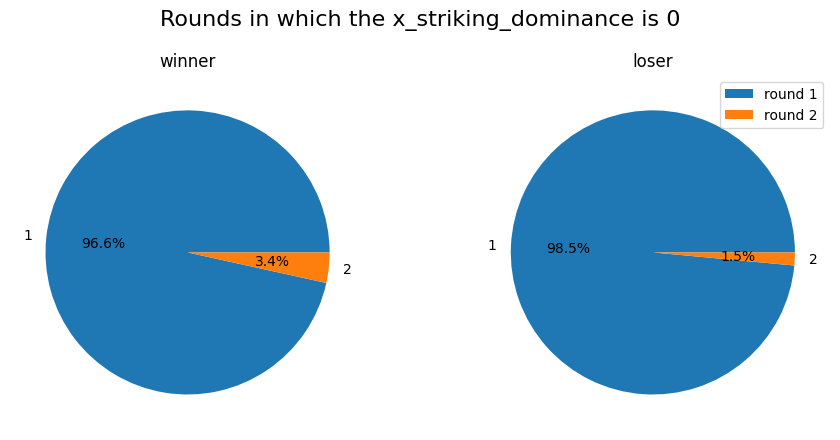

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].pie(zero_winner_striking_dominance, labels=[1,2], autopct="%.1f%%")
ax[1].pie(zero_loser_striking_dominance, labels=[1,2], autopct="%.1f%%")
ax[0].set_title("winner")
ax[1].set_title("loser")

plt.legend(['round 1', 'round 2'])
plt.tight_layout(pad=5)
fig.suptitle("Rounds in which the x_striking_dominance is 0", fontsize=16)
plt.show()

* As we can see, around 97% of 0 striking dominance factor comes from fights that ended in the first round.<br>
* There is still a small percentage of 0 striking dominance factor that comes from the fights that ended in the second round. I think the reason for this is just the lack of data points that the striking_dominance features was built upon, as the older UFC fights didn't have this detailed data, so let's take a look:

Winner striking dominance that has a value of 0 and happened in the second round:

In [34]:
df.loc[(df['winner_striking_dominance'] == 0) & (df['round'] == 2), :]

,event_date,method,round,time,time_format,referee,details,bout_type,bonus,event_name,...,winner_sig_str_clinch_pct,loser_sig_str_clinch_pct,winner_sig_str_ground_pct,loser_sig_str_ground_pct,winner_total_str_landed_pct,loser_total_str_landed_pct,winner_striking_dominance,loser_striking_dominance,winner_wrestling_dominance,loser_wrestling_dominance
7592,15/05/1998,Decision - Unanimous,2,3:00,1 Rnd + OT (12-3),John McCarthy,0,Heavyweight Bout,0,UFC 17: Redemption,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7667,12/07/1996,Decision - Unanimous,2,3:00,1 Rnd + OT (12-3),John McCarthy,0,Open Weight Bout,0,UFC 10: The Tournament,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Winner striking dominance that has a value of 0 and happened in the second round:

In [35]:
df.loc[(df['loser_striking_dominance'] == 0) & (df['round'] == 2), :]

,event_date,method,round,time,time_format,referee,details,bout_type,bonus,event_name,...,winner_sig_str_clinch_pct,loser_sig_str_clinch_pct,winner_sig_str_ground_pct,loser_sig_str_ground_pct,winner_total_str_landed_pct,loser_total_str_landed_pct,winner_striking_dominance,loser_striking_dominance,winner_wrestling_dominance,loser_wrestling_dominance
6907,23/01/2008,KO/TKO,2,0:37,3 Rnd (5-5-5),Herb Dean,Punches to Head On Ground,Lightweight Bout,0,UFC Fight Night: Swick vs Burkman,...,13.0,0.0,68.0,0.0,84.615385,0.0,156.615385,0.0,0.0,0.0
7592,15/05/1998,Decision - Unanimous,2,3:00,1 Rnd + OT (12-3),John McCarthy,0,Heavyweight Bout,0,UFC 17: Redemption,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
7667,12/07/1996,Decision - Unanimous,2,3:00,1 Rnd + OT (12-3),John McCarthy,0,Open Weight Bout,0,UFC 10: The Tournament,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


Observations:
* So, as we assumed, 4 empty data fights are from the 1996 / 1998;
* And the 2008 fight from the empty *loser_striking_difference* is an example, where a losing fighter could not land a single shot and, eventually, got knocked out.

#### KD (Knockdowns)

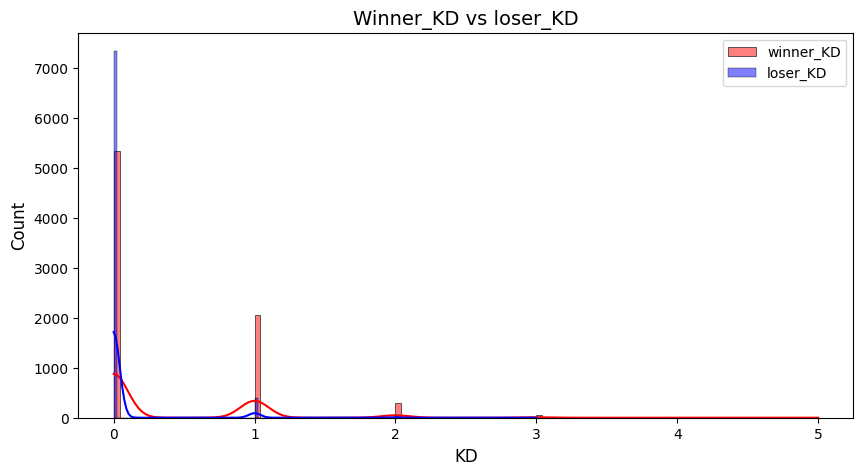

In [40]:
examine_feature_kde('KD')

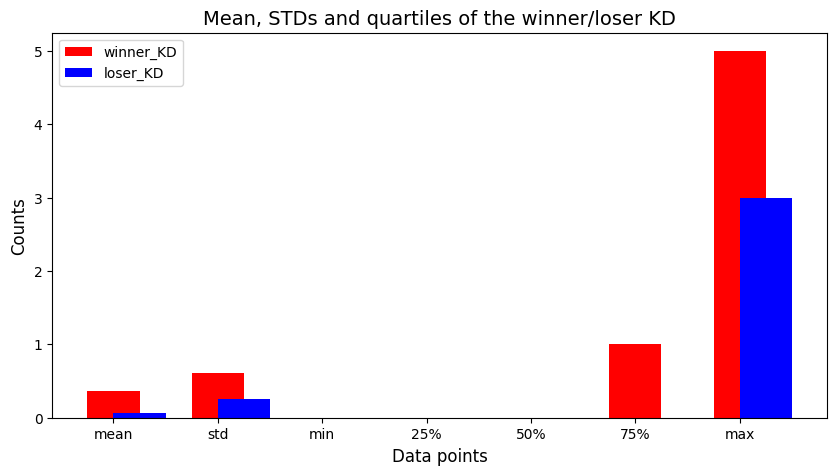

In [41]:
examine_feature_mean_std('KD')

#### sig_str_pct

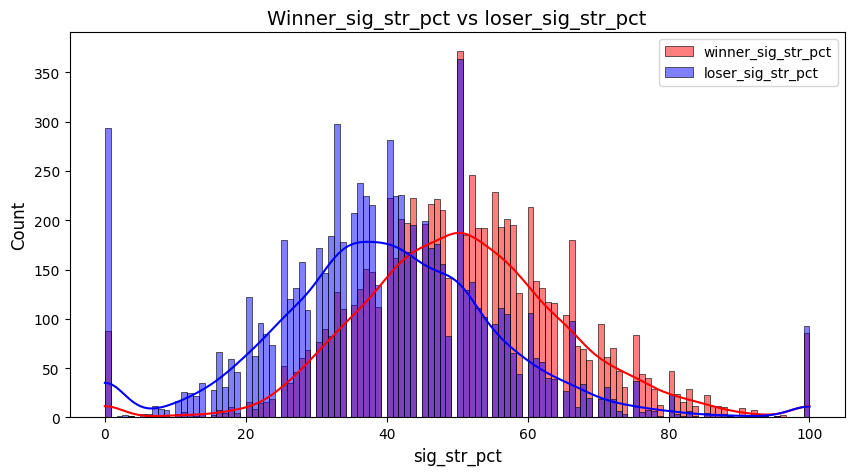

In [42]:
examine_feature_kde('sig_str_pct')

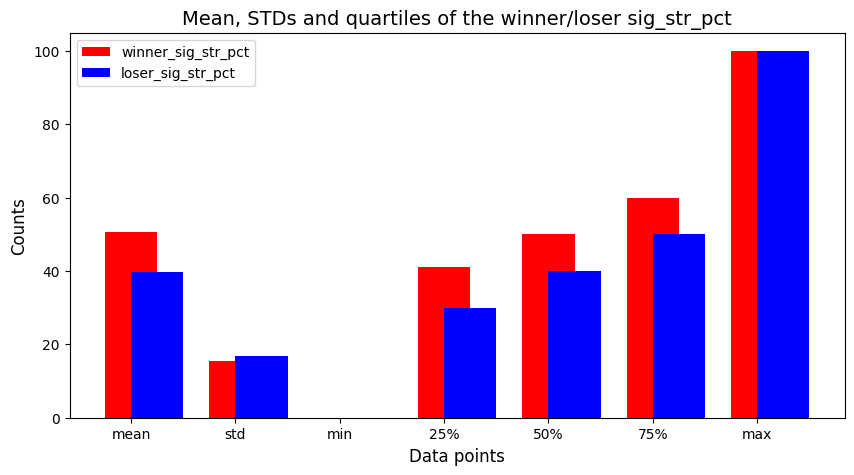

In [43]:
examine_feature_mean_std('sig_str_pct')

#### total_str_landed_pct

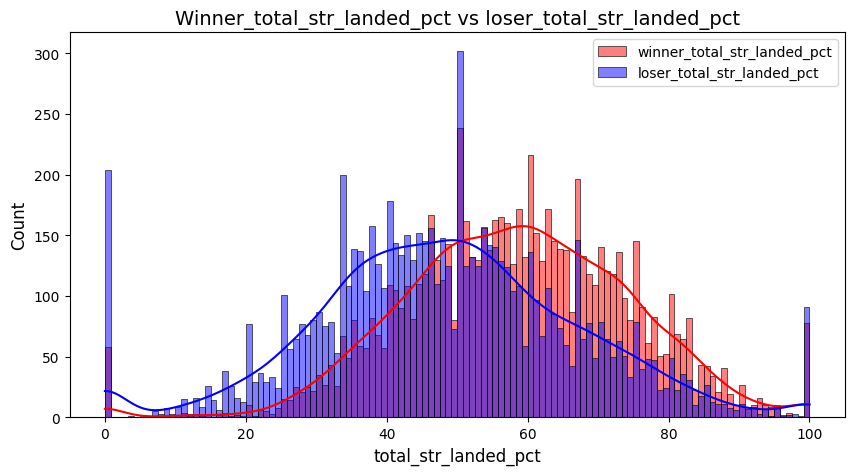

In [44]:
examine_feature_kde('total_str_landed_pct')

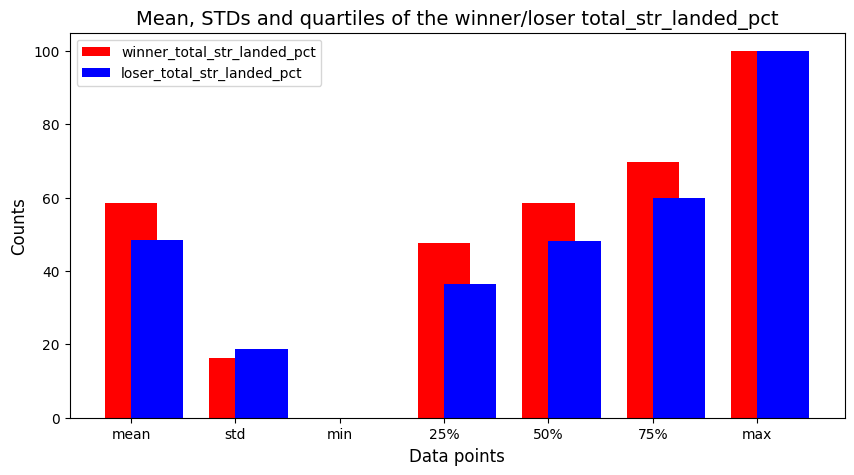

In [45]:
examine_feature_mean_std('total_str_landed_pct')

#### sig_str_head_pct

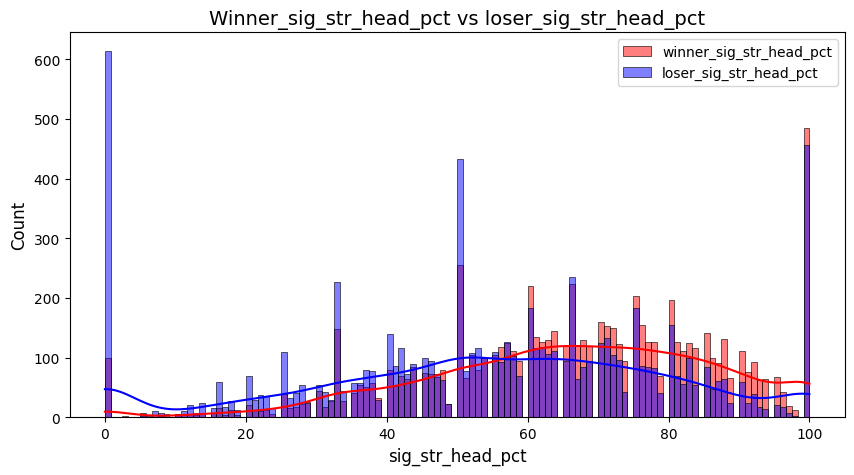

In [52]:
examine_feature_kde('sig_str_head_pct')

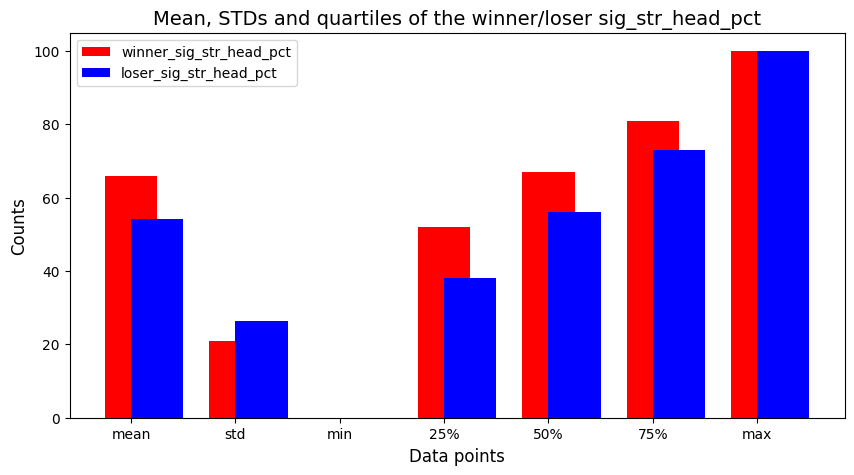

In [53]:
examine_feature_mean_std('sig_str_head_pct')

#### sig_str_body_pct

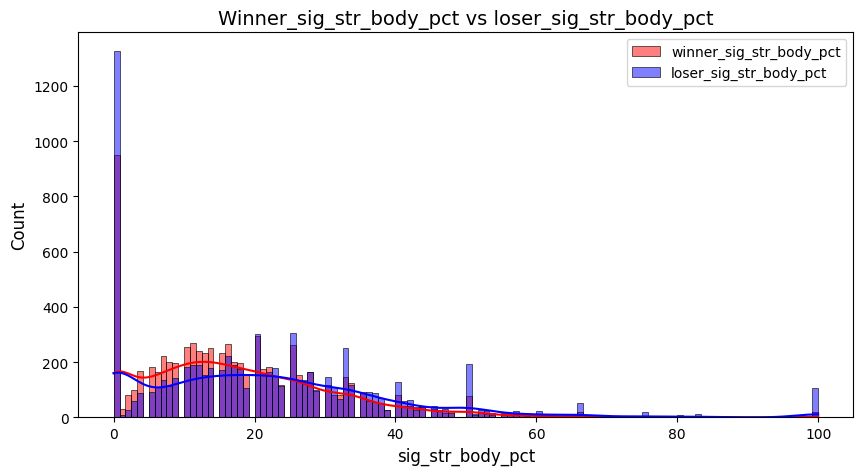

In [54]:
examine_feature_kde('sig_str_body_pct')

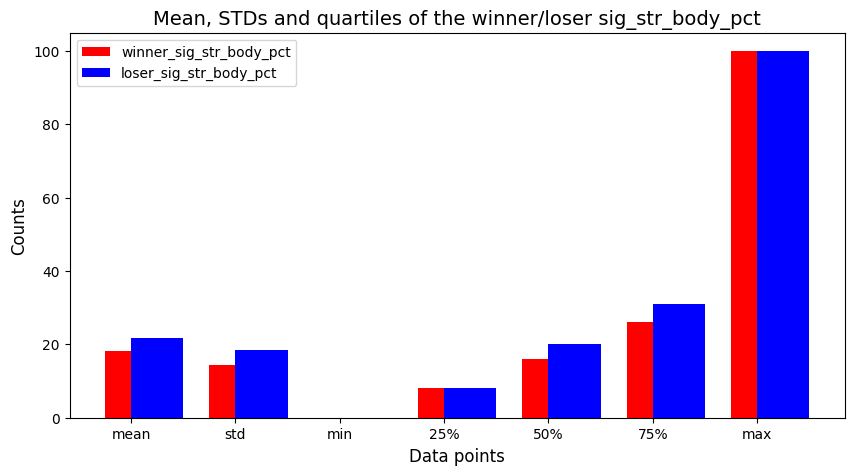

In [55]:
examine_feature_mean_std('sig_str_body_pct')

#### sig_str_leg_pct

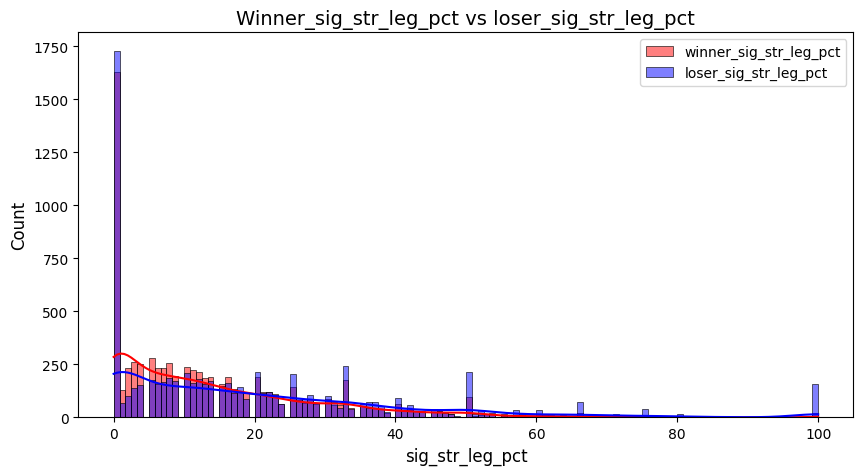

In [56]:
examine_feature_kde('sig_str_leg_pct')

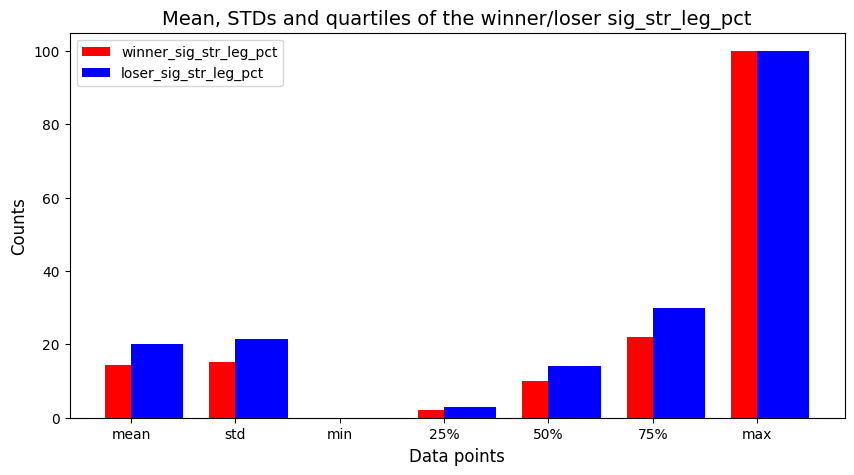

In [57]:
examine_feature_mean_std('sig_str_leg_pct')

#### sig_str_distance_pct

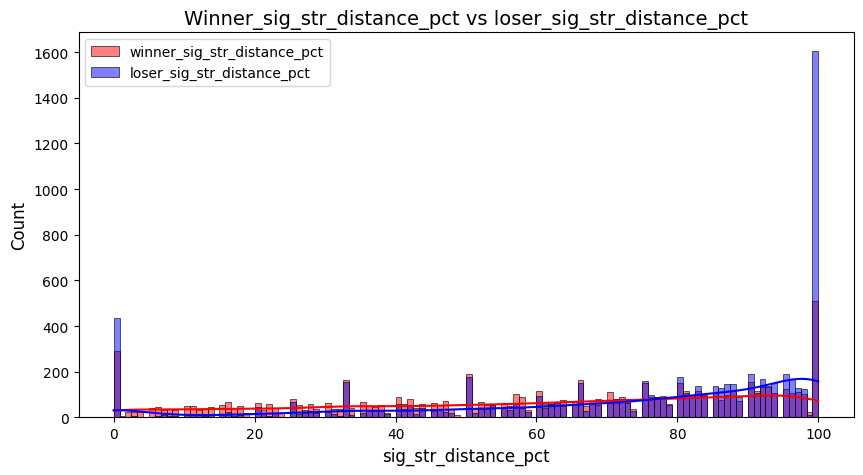

In [58]:
examine_feature_kde('sig_str_distance_pct')

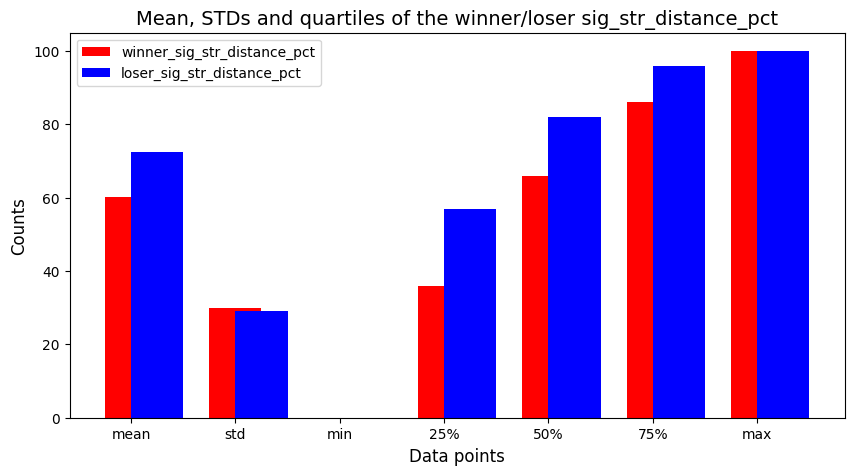

In [59]:
examine_feature_mean_std('sig_str_distance_pct')

#### sig_str_clinch_pct

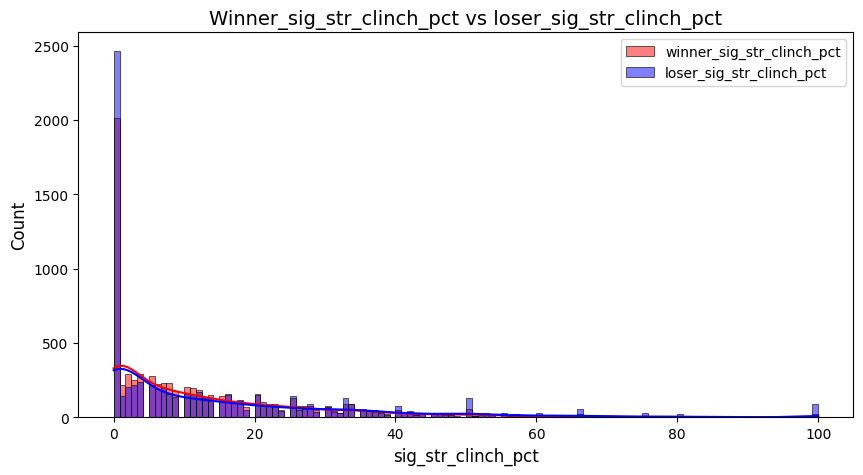

In [60]:
examine_feature_kde('sig_str_clinch_pct')

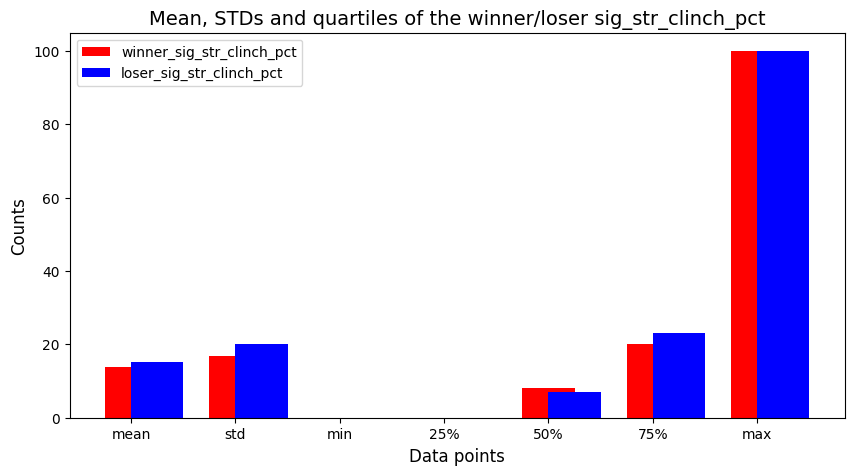

In [61]:
examine_feature_mean_std('sig_str_clinch_pct')

#### sig_str_ground_pct

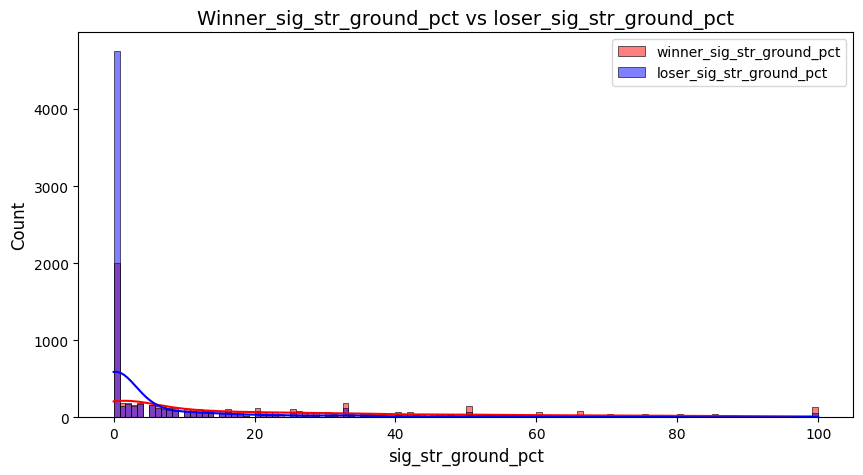

In [62]:
examine_feature_kde('sig_str_ground_pct')

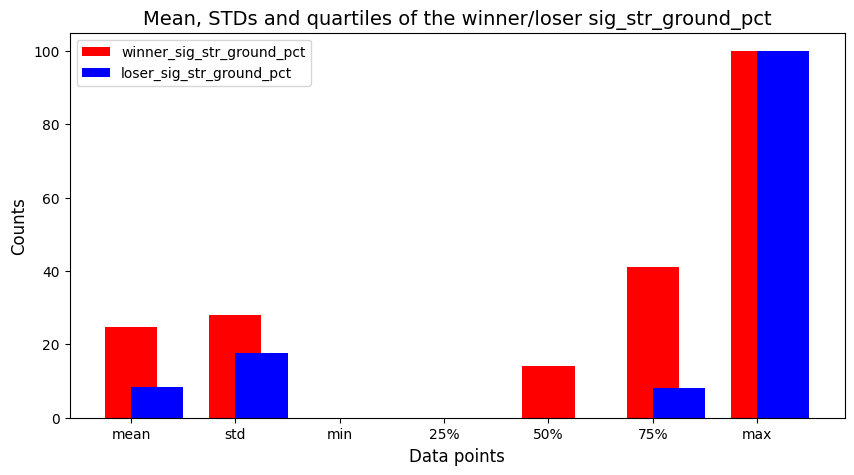

In [63]:
examine_feature_mean_std('sig_str_ground_pct')

#### Wrestling dominance

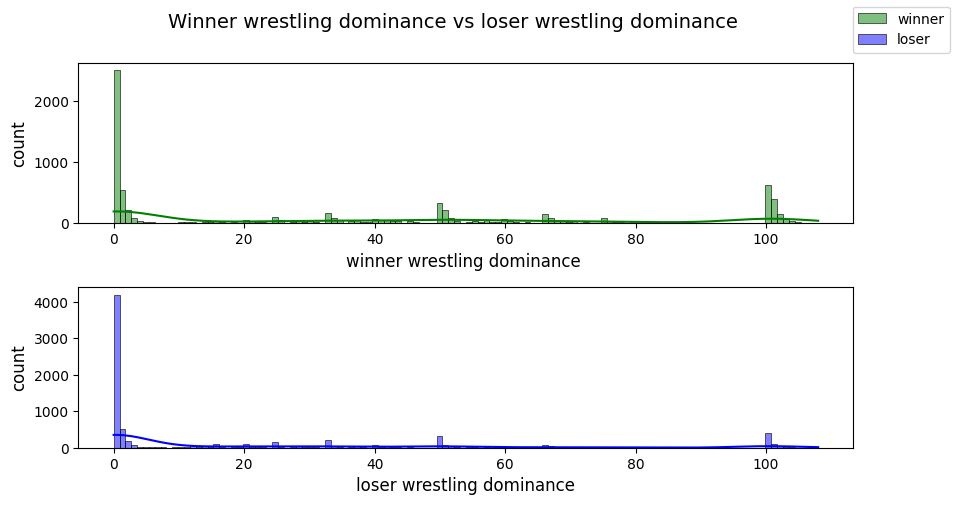

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
plt.suptitle("Winner wrestling dominance vs loser wrestling dominance", fontsize=14)

plt.subplot(2,1,1)
sns.histplot(df['winner_wrestling_dominance'], color='green', kde=True, bins=120, label='winner')
plt.xlabel("winner wrestling dominance ", fontdict={'fontsize': 12})
plt.ylabel("count", fontdict={'fontsize': 12})

plt.subplot(2,1,2)
sns.histplot(df['loser_wrestling_dominance'], color='blue', kde=True, bins=120, label='loser')
plt.xlabel("loser wrestling dominance", fontdict={'fontsize': 12})
plt.ylabel("count", fontdict={'fontsize': 12})

plt.subplots_adjust(hspace=0.4)
fig.legend()
plt.show()

Observations:
* We can see that the most of wrestling dominance factor is around 0 for both, winners, and losers. This indicates that fighters don't wrestle as much, as strike, also, since the fight starts on the feet and not on the ground;
* Even though a lot of wrestling dominance at 0 range have both winners, and fighters, winners have around 1.5 less wrestling dominance around 0 range than losers, losers' peak is around 4000, while winners' is around 2500);
* Both distributions have long tails extending to higher values of dominance, indicating a few fighters display extreme wrestling dominance;
* Winners have slighly more density in the higher dominance range than losers, implying that the higher wrestling dominance might correlate to winning.
* Extreme outliers show that winners have slightly more extreme wrestling dominance than losers at the 100 range.

Let's check the mean, std, min/max and quartiles:

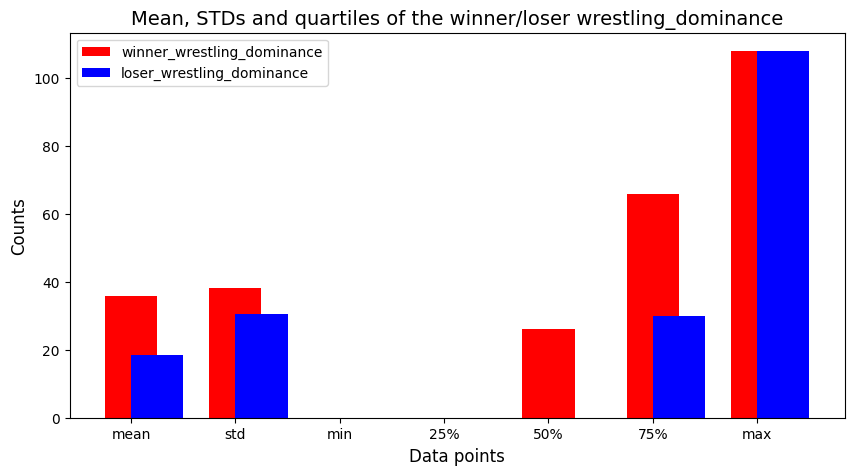

In [37]:
examine_feature_mean_std('wrestling_dominance')

Observations:
* Winners have a higher mean, around 10 points difference, meaning that on average they have a higher wrestling dominance score;
* Winners have a higher standard deviation, meaning that the data deviates from the mean a little bit more compared to losers' std;
* The first quartile is empty, due to a lot of samples being at 0;
* The second quartile (50%): unlike winners', losers' quartile is still 0, due to a bigger number of samples at the 0 range;
* The second and third (50% and 75%) quartiles confirm the bigger density for winners.

#### TD_pct

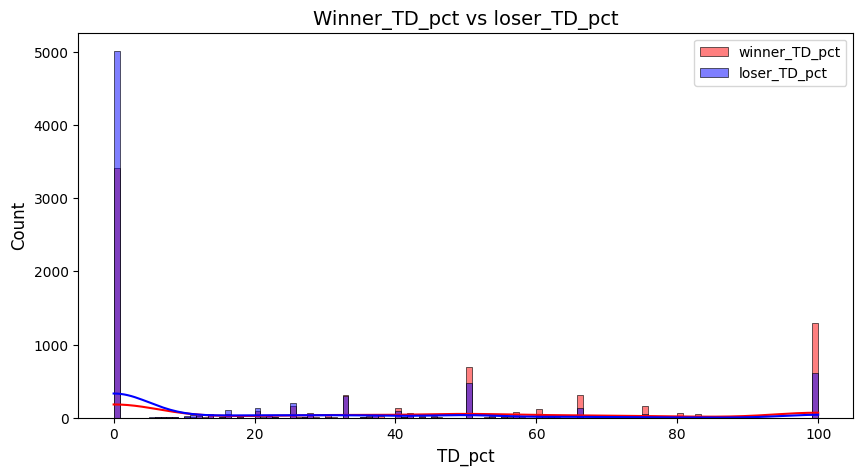

In [46]:
examine_feature_kde('TD_pct')

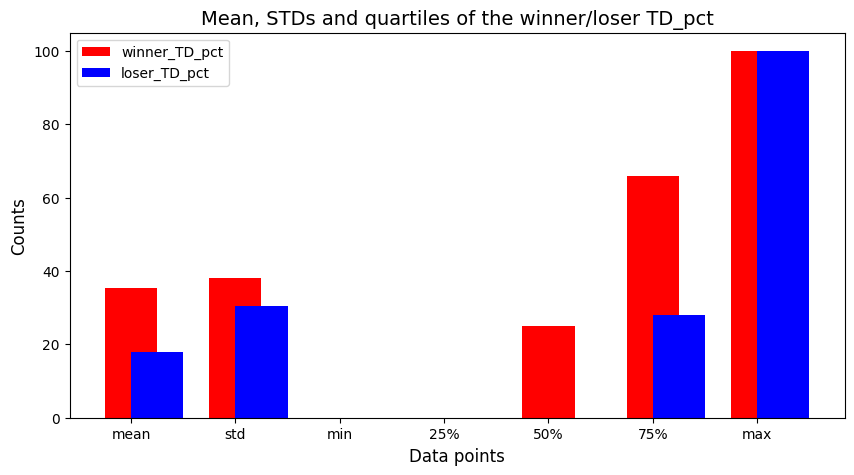

In [47]:
examine_feature_mean_std('TD_pct')

#### sub_att

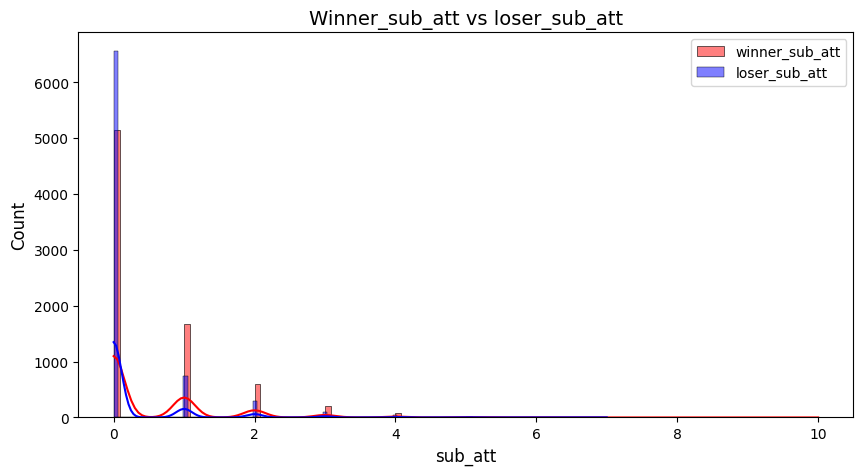

In [48]:
examine_feature_kde('sub_att')

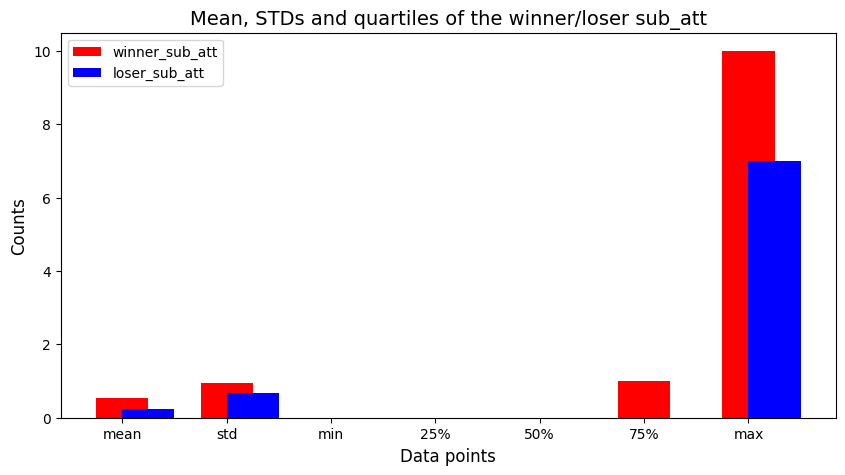

In [49]:
examine_feature_mean_std('sub_att')

#### rev

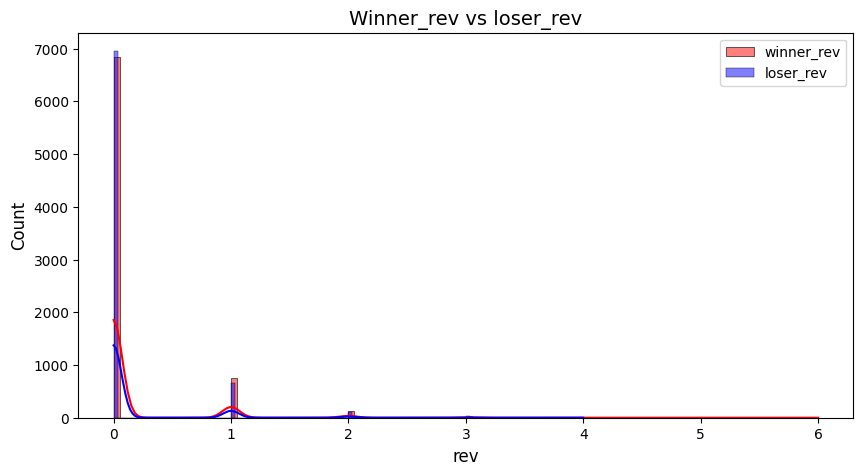

In [50]:
examine_feature_kde('rev')

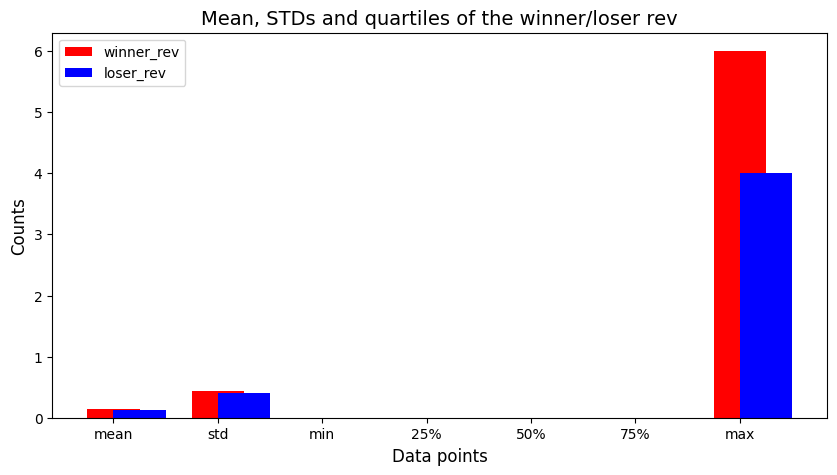

In [51]:
examine_feature_mean_std('rev')

#### Fight Control

Data types:

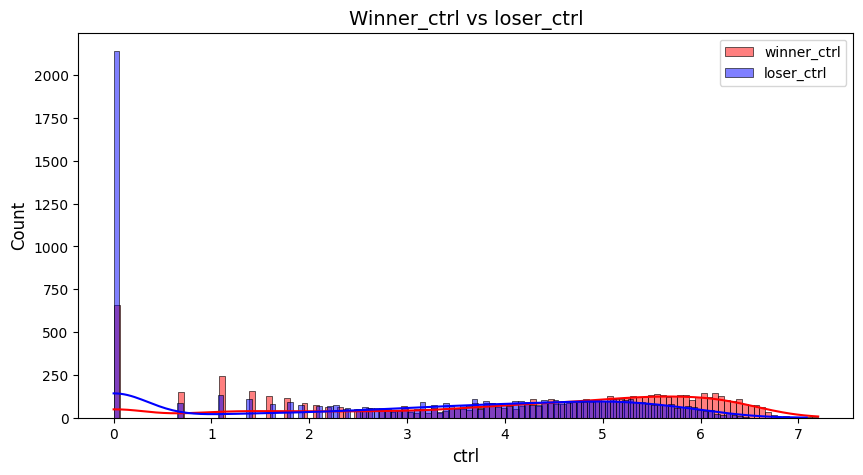

In [38]:
examine_feature_kde('ctrl', log_transform=True)

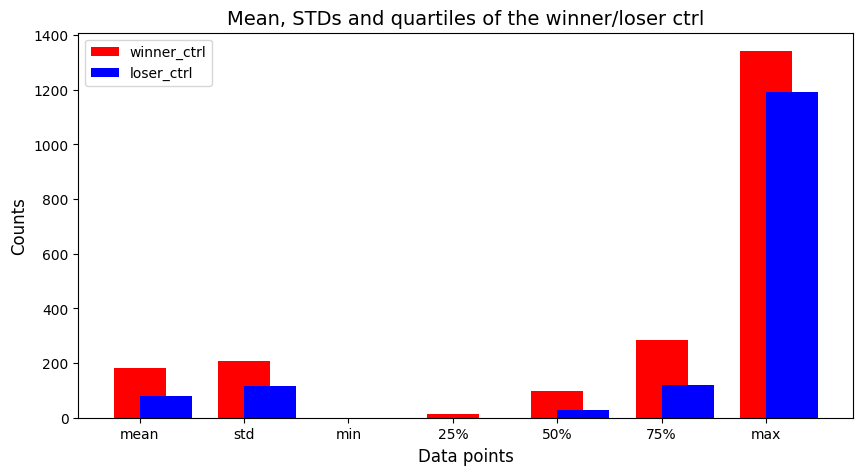

In [39]:
examine_feature_mean_std('ctrl')

## 5. Does being in a particular corner contribute to a victory?

Data:

In [64]:
winners_by_corner = df['winner'].value_counts()
winners_by_corner = winners_by_corner / sum(winners_by_corner) * 100

Let's plot:

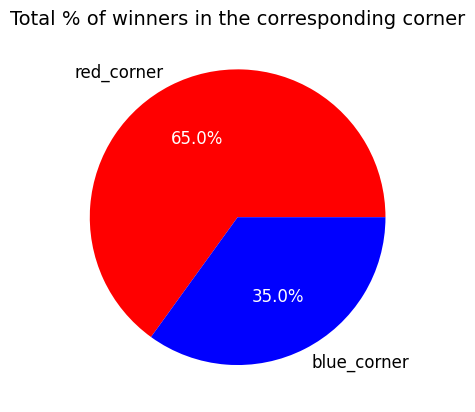

In [65]:
fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(winners_by_corner.values, autopct='%.1f%%', labels=['red_corner', 'blue_corner'], colors=['red', 'blue']
      , textprops={'fontsize': 12, 'color': 'black'})

# Changing the autotext color
for autotext in autotexts:
    autotext.set_color('white')
    
ax.set_title("Total % of winners in the corresponding corner", fontdict={'fontsize': 14})
plt.show()

This is actually funny at first glance, but it turns out that red corner is given to champions, and, higher ranked fighters.
<br>Where blue is assigned to lower ranked fighters and title challengers.